In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle

from glob import glob
from tqdm import tqdm
from collections import defaultdict
from datetime import date
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
import sys

sys.path.append("..")
from src.plot_style import *
stdrcparams(usetex=False)

In [4]:
df_simultaneousClassification_BTF = pd.read_csv('../results/Bus_Classification_BTF_simultaneous.csv')[['Year','Removed','simultaneous_pred','simultaneous_null']]
df_simultaneousClassification_WTF = pd.read_csv('../results/Bus_Classification_WTF_simultaneous.csv')[['Year','Removed','simultaneous_pred','simultaneous_null']]
df_simultaneousClassification_WWW = pd.read_csv('../results/Bus_Classification_WWW_simultaneous.csv')[['Year','Removed','simultaneous_pred','simultaneous_null']]
df_simultaneousClassification_BTFW = pd.read_csv('../results/Bus_Classification_BTFW_simultaneous.csv')[['Year','Removed','simultaneous_pred','simultaneous_null']]

In [5]:
df_simultaneousClassification = {
                                'Unweighted Topological Features': df_simultaneousClassification_BTF,
                                 'Weighted Topological Features': df_simultaneousClassification_WTF,
                                 'Weight (Number of Buses)': df_simultaneousClassification_WWW,
                                 'Unweighted Topological Features + Weight': df_simultaneousClassification_BTFW
                                }

In [6]:
def pure_plot_confusion_matrix(cm, ax = None):
    classes = ['Retained','Removed']
    sns.heatmap(cm, square = True, annot= True, cbar = False, cmap=plt.cm.Blues,ax = ax,annot_kws={"fontsize":25})
    ax.set_ylim(0,2)
    ax.tick_params( bottom=False, right=False,left=False, labeltop=False, labelbottom=True)
    ax.invert_yaxis()
    ax.set(xticks = np.arange(cm.shape[1])+0.5,
           yticks = np.arange(cm.shape[0])+0.25,
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel = 'True label',
           xlabel = 'Predicted label') 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


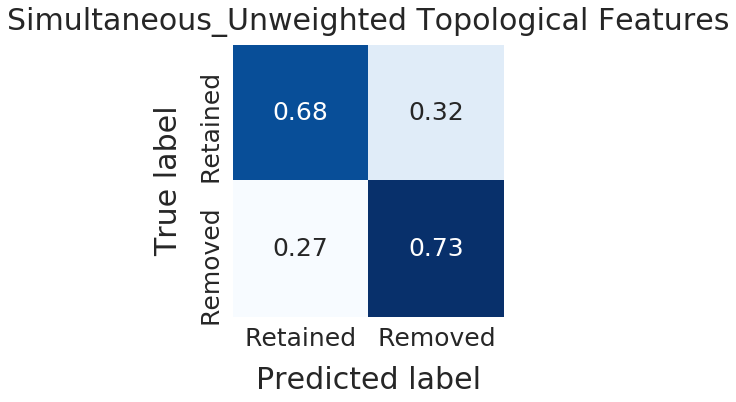

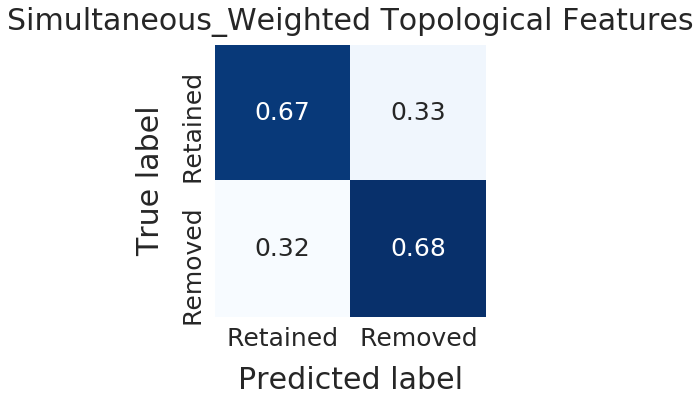

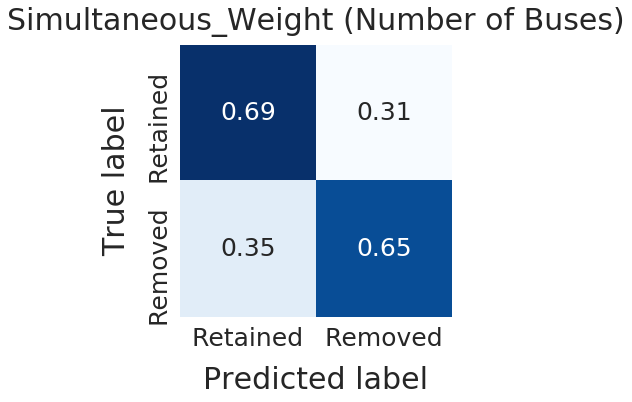

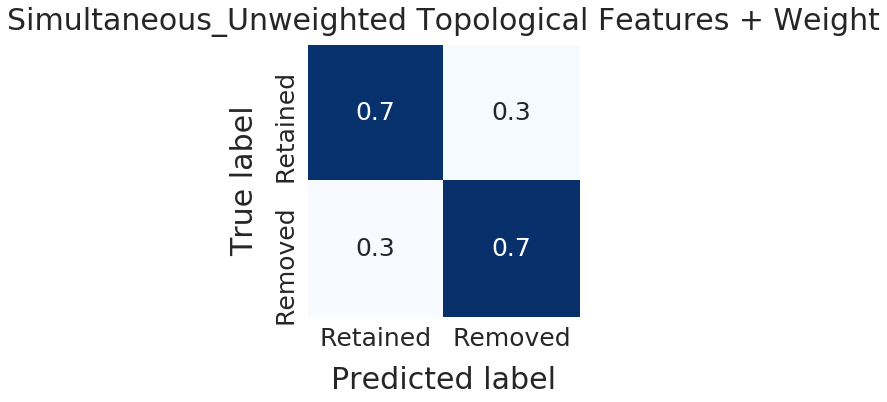

In [7]:
year = '2014-01-01'
for name,df in df_simultaneousClassification.items():
    y_test, y_predict = df[df.Year==year][['Removed','simultaneous_pred']].values.T
    cm = confusion_matrix(y_test.astype('int'), y_predict.astype('int'))
    cm = cm.astype('float') / cm.sum(axis = 1)[:,None]
    fig,ax = plt.subplots(figsize=(5,5))
    plt.title(f"Simultaneous_{name}")
    pure_plot_confusion_matrix(cm, ax=ax)
    plt.show()

In [8]:
year_list = df_simultaneousClassification_BTF.Year.unique()
balanced_acc = defaultdict(list)
for name,df in df_simultaneousClassification.items():
    for year in year_list:
        y_test, y_predict,y_null = df[df.Year==year][['Removed','simultaneous_pred','simultaneous_null']].values.T
        try:
            balanced_acc['Balanced Acc'].append(balanced_accuracy_score(y_test.astype('int'), y_predict.astype('int')))
            balanced_acc['Balanced Acc Null'].append(balanced_accuracy_score(y_test.astype('int'), y_null.astype('int')))
            balanced_acc['Model'].append(name)
        except:
            pass

In [9]:
df = pd.DataFrame(balanced_acc)
df = df.groupby('Model').mean()
df

,Balanced Acc,Balanced Acc Null
Model,,
Unweighted Topological Features,0.650294,0.501777
Unweighted Topological Features + Weight,0.705817,0.512879
Weight (Number of Buses),0.688047,0.487595
Weighted Topological Features,0.688428,0.497634


In [10]:
with open('../results/Bus_Classification_BTF_nonsimultaneous.pkl','rb') as f:    
    df_nonsimultaneousClassification_BTF = pickle.load(f)
with open('../results/Bus_Classification_WTF_nonsimultaneous.pkl','rb') as f:    
    df_nonsimultaneousClassification_WTF = pickle.load(f)
with open('../results/Bus_Classification_WWW_nonsimultaneous.pkl','rb') as f:    
    df_nonsimultaneousClassification_WWW = pickle.load(f)
with open('../results/Bus_Classification_BTFW_nonsimultaneous.pkl','rb') as f:    
    df_nonsimultaneousClassification_BTFW = pickle.load(f)

In [11]:
df_nonsimultaneousClassification = {
                                    'Unweighted Topological Features': df_nonsimultaneousClassification_BTF,
                                     'Weighted Topological Features': df_nonsimultaneousClassification_WTF,
                                     'Weight (Number of Buses)': df_nonsimultaneousClassification_WWW,
                                     'Unweighted Topological Features + Weight': df_nonsimultaneousClassification_BTFW}

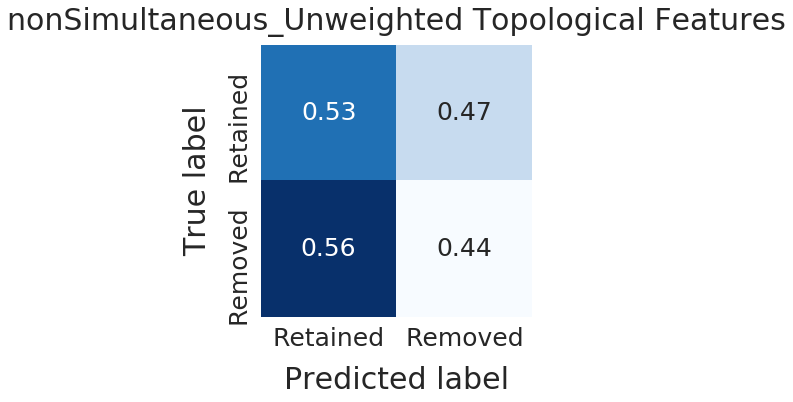

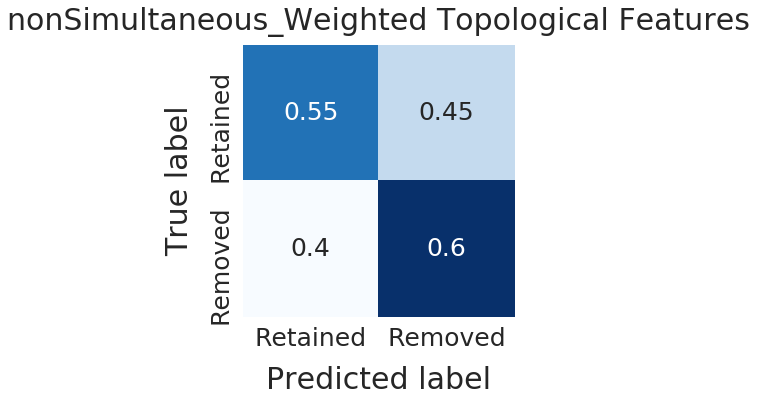

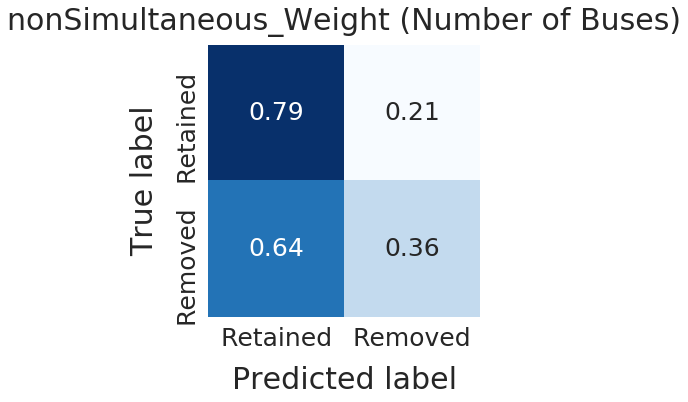

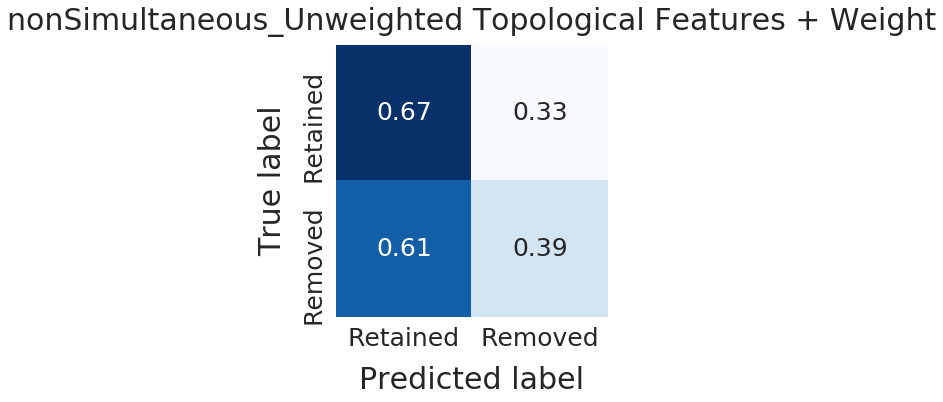

In [12]:
year0 = '2009-01-01'
year1 = '2009-03-01'
for name,df in df_nonsimultaneousClassification.items():
    for year_train , year_test, y_test, y_pred, y_null in df:
        if year_train==year0 and year_test==year1:
            break
    y_test, y_predict = y_test, y_pred
    cm = confusion_matrix(y_test, y_predict)
    cm = cm.astype('float') / cm.sum(axis = 1)[:,None]
    fig,ax = plt.subplots(figsize=(5,5))
    plt.title(f"nonSimultaneous_{name}")
    pure_plot_confusion_matrix(cm, ax=ax)
    plt.show()

In [13]:
balanced_acc_non = defaultdict(list)
for name, df in df_nonsimultaneousClassification.items():
    for year_train , year_test, y_test, y_pred, y_null in df:
        if year_train!=year_test:
            balanced_acc_non['Balanced Acc'].append(balanced_accuracy_score(y_test, y_pred))
            balanced_acc_non['Balanced Acc Null'].append(balanced_accuracy_score(y_test, y_null))
            balanced_acc_non['Model'].append(name) 

In [14]:
df = pd.DataFrame(balanced_acc_non)
df = df.groupby('Model').mean()
df

,Balanced Acc,Balanced Acc Null
Model,,
Unweighted Topological Features,0.515108,0.500627
Unweighted Topological Features + Weight,0.543668,0.499350
Weight (Number of Buses),0.529983,0.504482
Weighted Topological Features,0.516778,0.498941


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


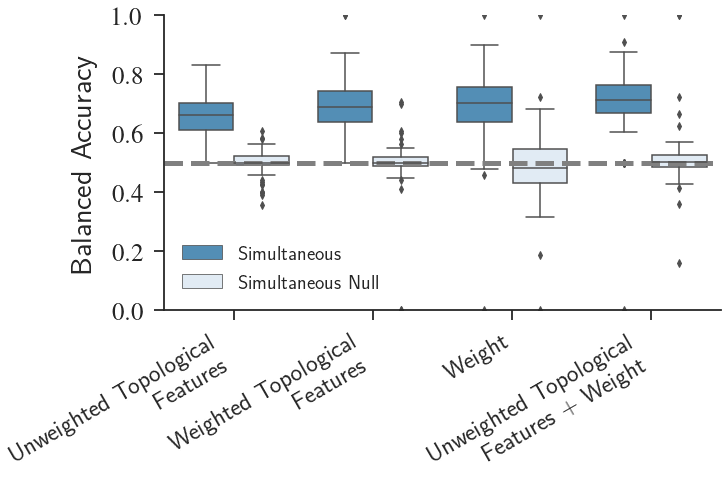

In [15]:
stdrcparams(usetex=True)
df1 = pd.DataFrame(balanced_acc)[['Model','Balanced Acc']]
df1['Test'] = 'Simultaneous'
df2 = pd.DataFrame(balanced_acc_non)[['Model','Balanced Acc']]
df2['Test'] = 'Non-Simultaneous'
df3 = pd.DataFrame(balanced_acc)[['Model','Balanced Acc Null']].rename(columns={'Balanced Acc Null':'Balanced Acc'})
df3['Test'] = 'Simultaneous Null'
df4 = pd.DataFrame(balanced_acc_non)[['Model','Balanced Acc Null']].rename(columns={'Balanced Acc Null':'Balanced Acc'})
df4['Test'] = 'Non-Simultaneous Null'
df = pd.concat([df1,df3])
models=[ 'Unweighted Topological Features',
         'Weighted Topological Features',
         'Weight (Number of Buses)',
         'Unweighted Topological Features + Weight']
xlbls=['Unweighted Topological \nFeatures',
         'Weighted Topological \nFeatures',
         'Weight',
         'Unweighted Topological \nFeatures + Weight']
df = df[df.Model.isin(models)]
fig,ax = plt.subplots(figsize=(xs*0.9,ys))
ax = sns.boxplot(x="Model", y="Balanced Acc",hue='Test',
                 palette=sns.color_palette(['#4292c6','#deebf7']),#,'#41ab5d','#e5f5e0']),
                 data=df,ax=ax,linewidth=1.5,
                 hue_order=['Simultaneous','Simultaneous Null'])#,'Non-Simultaneous','Non-Simultaneous Null'])
custom_frame(ax)
plt.ylabel('Balanced Accuracy')
plt.xlabel('')
plt.xticks(range(4),xlbls)
plt.xticks(rotation=30, ha='right')
plt.legend(frameon=False)
ax.axhline(y=0.5, linestyle = '--',color ='grey')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

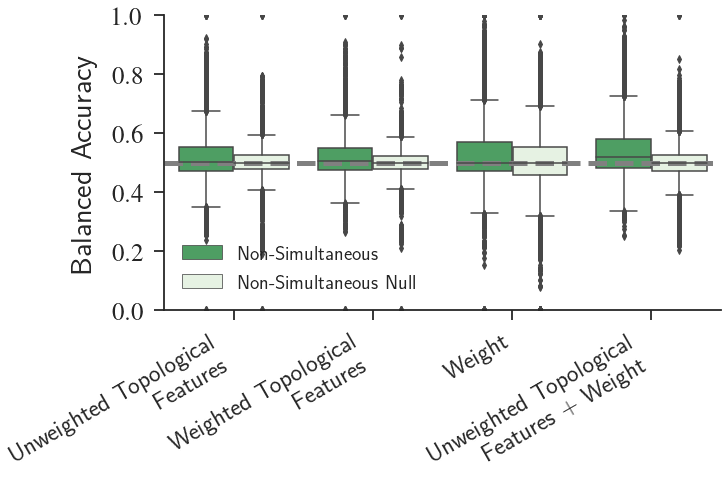

In [16]:
stdrcparams(usetex=True)
df1 = pd.DataFrame(balanced_acc)[['Model','Balanced Acc']]
df1['Test'] = 'Simultaneous'
df2 = pd.DataFrame(balanced_acc_non)[['Model','Balanced Acc']]
df2['Test'] = 'Non-Simultaneous'
df3 = pd.DataFrame(balanced_acc)[['Model','Balanced Acc Null']].rename(columns={'Balanced Acc Null':'Balanced Acc'})
df3['Test'] = 'Simultaneous Null'
df4 = pd.DataFrame(balanced_acc_non)[['Model','Balanced Acc Null']].rename(columns={'Balanced Acc Null':'Balanced Acc'})
df4['Test'] = 'Non-Simultaneous Null'
df = pd.concat([df2,df4])
models=[ 
    'Unweighted Topological Features',
         'Weighted Topological Features',
         'Weight (Number of Buses)',
         'Unweighted Topological Features + Weight'
       ]
xlbls=[
    'Unweighted Topological \nFeatures',
         'Weighted Topological \nFeatures',
         'Weight',
         'Unweighted Topological \nFeatures + Weight'
]
df = df[df.Model.isin(models)]
fig,ax = plt.subplots(figsize=(xs*0.9,ys))
ax = sns.boxplot(x="Model", y="Balanced Acc",hue='Test',
                 palette=sns.color_palette(['#41ab5d','#e5f5e0']),#,'#41ab5d','#e5f5e0']),
                 data=df,ax=ax,linewidth=1.5,
                 hue_order=['Non-Simultaneous','Non-Simultaneous Null'])#,'Non-Simultaneous','Non-Simultaneous Null'])
custom_frame(ax)
plt.ylabel('Balanced Accuracy')
plt.xlabel('')
plt.xticks(range(4),xlbls)
plt.xticks(rotation=30, ha='right')
plt.legend(loc='lower left', frameon=False)
ax.axhline(y=0.5, linestyle = '--',color ='grey')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

In [17]:
import shap
def singleShap(test_list, year_list,shap_list):
    year = str(date(2008,1,1))
    idx = year_list.index(year)
    shap_values = shap_list[idx]
    test_df = test_list[idx]
    fig,ax = plt.subplots(figsize=(xs,ys/1.2))
    shap.summary_plot(shap_values, test_df,alpha=0.7,show=False,
                      color_bar=False,auto_size_plot=True,plot_size=(xs,ys/1.2))
    plt.xlabel('SHAP value \n (impact on model output)',fontsize=35)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    labels = [item.get_text() for item in ax.get_yticklabels()]
    for i in range(len(labels)):
        if labels[i]=='Curr Weight':
            labels[i]= r'\textbf{Weight}'
        if labels[i]=='Resource Allocation':
            labels[i]= r'\textbf{Resource Allocation}'
        elif labels[i]=='Hub Promoted':
            labels[i]=r'\textbf{Hub Promoted}'
        else:
            pass
    ax.set_yticklabels(labels)
    plt.ylim(3.5,11.5)
    plt.tight_layout()
    plt.show()

In [18]:
def get_temporal_order(shap_list):
    importance_array = []
    for shap_values in shap_list: 
        array = -np.abs(shap_values).mean(0)
        order = array.argsort()
        ranks = order.argsort()
        importance_array.append(ranks+1)
    return(np.array(importance_array))

In [19]:
with open('../results/Bus_Classification_BTF_SHAP.pkl','rb') as f:    
    df_SHAPClassification_BTF = pickle.load(f)
with open('../results/Bus_Classification_BTFW_SHAP.pkl','rb') as f:    
    df_SHAPClassification_BTFW = pickle.load(f)
df_SHAPClassification = {
                        'BTF': df_SHAPClassification_BTF,
                        'BTFW': df_SHAPClassification_BTFW}

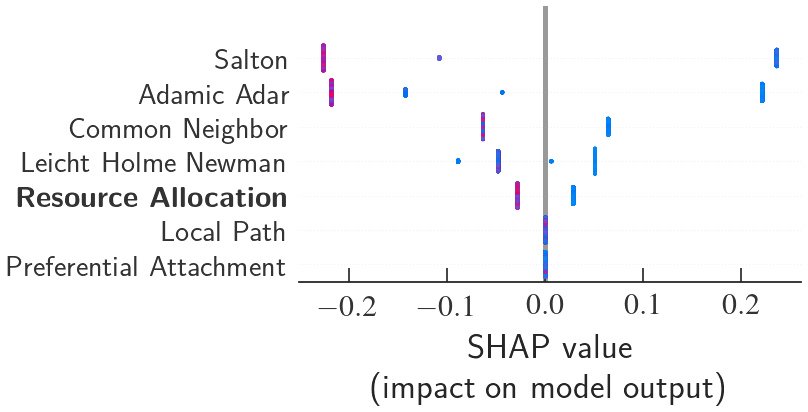

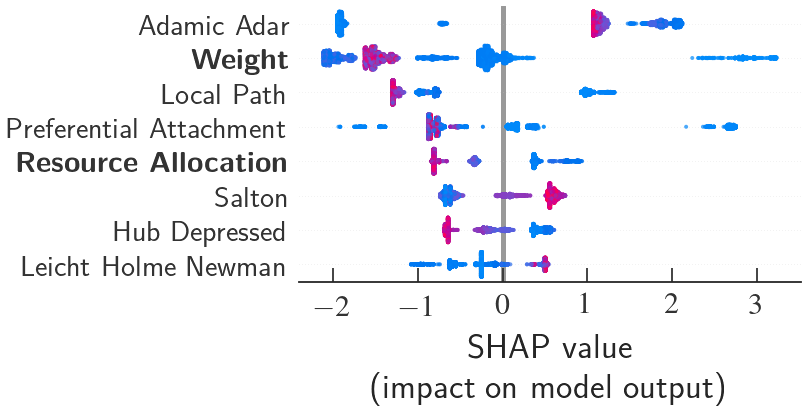

In [20]:
for name, df in df_SHAPClassification.items():
    singleShap(*df)

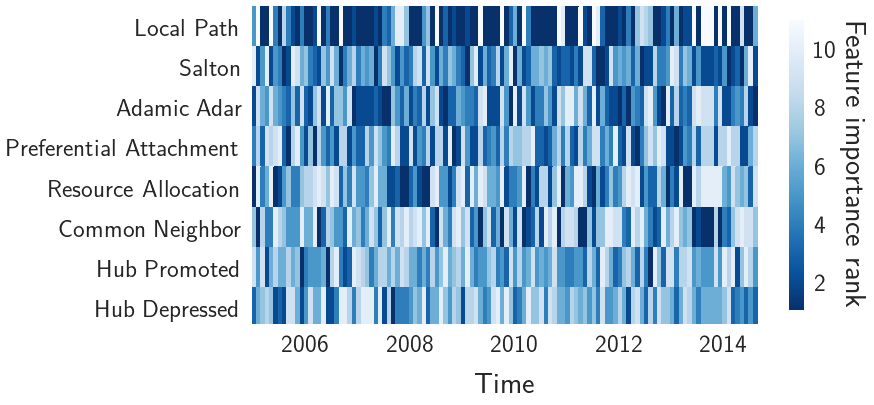

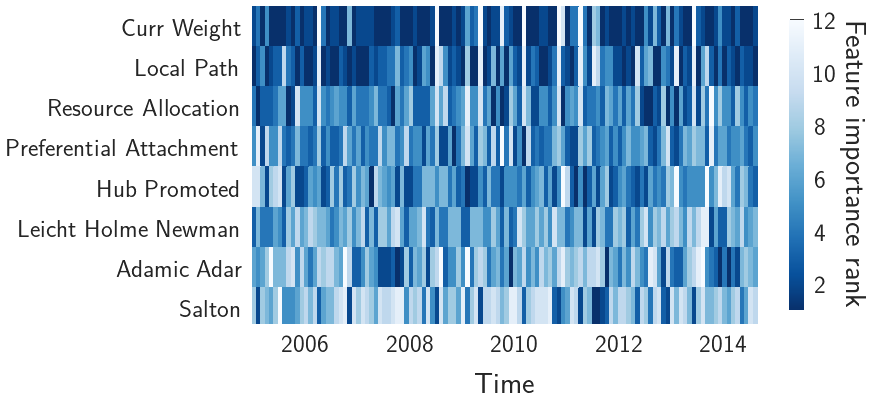

In [21]:
for name, df in df_SHAPClassification.items():
    fig,ax = plt.subplots(figsize=(xs,ys/1.2))
    features = list(df[0][0].columns)
    importance = get_temporal_order(df[2][0:0+24*6])
    x= [j for _,j in sorted(zip(importance.T.mean(1),importance.T))]
    y=  [j for _,j in sorted(zip(importance.T.mean(1),features))]
    ax = sns.heatmap(x,
                     cmap=mpl.cm.get_cmap('Blues_r'),
                     yticklabels=y,
                     xticklabels=False,
                     cbar_kws={'label': 'Feature importance rank',
                               'ticks': [2,4,6,8,10,12] ,
                               'shrink': 11/12,
                              'anchor':(0.0, 100)}
                    )
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels(['2','4','6','8','10','12'])
    cbar.set_label('Feature importance rank',labelpad=30,rotation=360-90)
    plt.ylim(7.9,0)
    plt.xticks([12+24*i for i in range(5)],[date(2006+i*2,1,1).year for i in range(5)])
    plt.xlabel('Time')
    plt.show()